In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
sampled1 = np.load("samples/500H/planned_traj1_0.npy", allow_pickle=True)
sampled2 = np.load("samples/500H/planned_traj2_0.npy", allow_pickle=True)

In [16]:
np.shape(sampled1)

(5000, 7)

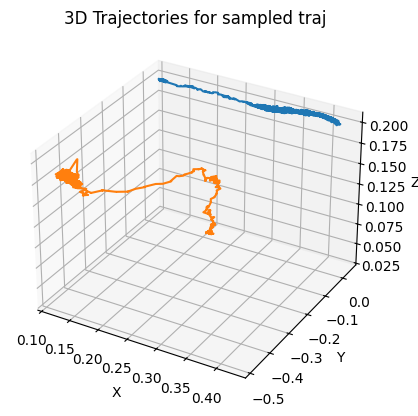

In [17]:
from mpl_toolkits.mplot3d import Axes3D

def plot_trajectories(arr1: np.ndarray, arr2:np.ndarray):
    x1, y1, z1 = arr1[:, 0], arr1[:, 1], arr1[:, 2]
    x2, y2, z2 = arr2[:, 0], arr2[:, 1], arr2[:, 2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x1, y1, z1)
    ax.plot(x2, y2, z2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Trajectories for sampled traj')
    plt.show()

plot_trajectories(sampled1, sampled2)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# --- Configuration ---
# Set the index 'i' for the trajectory you want to plot
trajectory_index = 19

# Adjust the animation speed and smoothness
# A larger step will make the animation faster but less detailed.
frame_step = 20
# Frames per second for the output GIF
animation_fps = 15

# --- 2. Select the Trajectories ---
# Select the data for the two trajectories based on the index
# traj1_data = expert_states[trajectory_index, ::frame_step, :3]
# traj2_data = expert_states[trajectory_index, ::frame_step, 7:10]
traj1_data = sampled1[::frame_step, :3]
traj2_data = sampled2[::frame_step, :3]
num_frames = traj1_data.shape[0]


# --- 3. Set up the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize two empty 3D lines
line1, = ax.plot([], [], [], lw=2, label='Trajectory 1 (data[:, :, :3])')
line2, = ax.plot([], [], [], lw=2, label='Trajectory 2 (data[:, :, 7:10])')

# Set plot limits based on the data range to ensure everything is visible
all_data = np.vstack([traj1_data, traj2_data])
ax.set_xlim(all_data[:, 0].min(), all_data[:, 0].max())
ax.set_ylim(all_data[:, 1].min(), all_data[:, 1].max())
ax.set_zlim(all_data[:, 2].min(), all_data[:, 2].max())

# Add labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Animated 3D Trajectories for Index {trajectory_index}')
ax.legend()
ax.grid(True)


# --- 4. Define the Animation Update Function ---
def update(frame):
    """
    This function is called for each frame of the animation.
    It updates the data for the two lines, making them longer in each frame.
    """
    # Update trajectory 1
    line1.set_data(traj1_data[:frame+1, 0], traj1_data[:frame+1, 1])
    line1.set_3d_properties(traj1_data[:frame+1, 2])

    # Update trajectory 2
    line2.set_data(traj2_data[:frame+1, 0], traj2_data[:frame+1, 1])
    line2.set_3d_properties(traj2_data[:frame+1, 2])

    return line1, line2


# --- 5. Create and Save the Animation ---
# Create the animation object
ani = FuncAnimation(
    fig,
    update,
    frames=num_frames,
    blit=True
)

# Save the animation as a GIF file
output_filename = 'viz/500H/sampled0.gif'
print(f"Rendering and saving animation to '{output_filename}'...")
# The 'Pillow' writer is commonly available and good for creating GIFs.
ani.save(output_filename, writer='pillow', fps=animation_fps)
plt.close(fig) # prevent static plot from displaying
print("Animation saved successfully.")


Rendering and saving animation to 'viz/500H/sampled0.gif'...
Animation saved successfully.
